Types of Classification
1. Binary Classification(Pizza and Not Pizza)
2. Multiclass Classification(Is it pizza, a dog, or chips)
3. Multilabel classification

## Creating data to view and fit

In [22]:
from sklearn.datasets import make_circles
import numpy as np

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


# Make 1000 examples
n_samples = 1000

# Create circles
x, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)
print(x[:10])
print(y[:10])

[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]
 [-0.47964637  0.67643477]
 [-0.01364836  0.80334872]
 [ 0.77151327  0.14775959]
 [-0.16932234 -0.79345575]
 [-0.1214858   1.02150905]]
[1 1 1 1 0 1 1 1 1 0]


In [2]:
# Let's visualize the data
circles = pd.DataFrame({"X0":x[:, 0], "X1":x[:, 1], "label":y})
circles

X0        X1  label
0    0.754246  0.231481      1
1   -0.756159  0.153259      1
2   -0.815392  0.173282      1
3   -0.393731  0.692883      1
4    0.442208 -0.896723      0
..        ...       ...    ...
995  0.244054  0.944125      0
996 -0.978655 -0.272373      0
997 -0.136900 -0.810012      1
998  0.670362 -0.767502      0
999  0.281057  0.963824      0

[1000 rows x 3 columns]

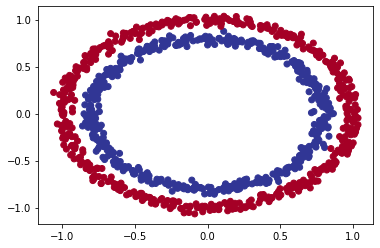

In [3]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and output shapes

In [4]:
# Check the shapes or our features abd labels
x.shape, y.shape

((1000, 2), (1000,))

In [5]:
# How many samples we're working with
len(x), len(y)

(1000, 1000)

In [6]:
# View the first example of features and labels
x[0] , y[0] 
# For the x, it is taking the first row(or major group if you will)

(array([0.75424625, 0.23148074]), 1)

## Steps in modeling

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                               
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_1.fit(x, y, epochs=100)

In [13]:
# Let's train for longer
model_1.fit(x, y, epochs=200)
model_1.evaluate(x, y)

Epoch 1/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.4700
Epoch 2/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 3/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6946 - accuracy: 0.4720
Epoch 4/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.4830
Epoch 5/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.4660
Epoch 6/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.5010
Epoch 7/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.5030
Epoch 8/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.4800
Epoch 9/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.4790
Epoch 10/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4790
Epoch 11/

[0.6934829950332642, 0.5]

In [ ]:
# Let's try adding another layer
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)                                
])

model_2.compile(loss=tf.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

model_2.fit(x, y, epochs=100)

model_2.evaluate(x, y)

## Improving our model

-- Add layers, add neurons, change activation functions, change optimization functions, and change the learning rate

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                               
])

model_3.compile(loss=tf.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(x, y, epochs=100)
model_3.evaluate(x, y)

## To visualize our predictions make following function

--It is going to take in x as inputs and y as labels
--Create a meshgrid of the different x values
--Make predictions across the meshgrid
--Plot predictiosn and boundary between prediction and actual

In [ ]:
def plot_decision_boundary(model, x, y):
  # Definet he axis boudnaries of the plot and create a meshgrid
  x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
  y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  #Create x value
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together

  # Make predictions 
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.coontourf(xx, yy, y_pred, cmap=)
